In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import Model, load_model, Sequential
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameters
fpath_train = 'C:/Users/MSI KATANA/Desktop/practice ML/Computer-vision-projects-by-Inupa-Bandara/Nike vs adidas shoe classification/train'
fpath_valid = 'C:/Users/MSI KATANA/Desktop/practice ML/Computer-vision-projects-by-Inupa-Bandara/Nike vs adidas shoe classification/validation'
fpath_test = 'C:/Users/MSI KATANA/Desktop/practice ML/Computer-vision-projects-by-Inupa-Bandara/Nike vs adidas shoe classification/test'
batch_size = 100
img_size = (224, 224)

In [12]:
# ImageDataGenerator for training and validation (without validation_split)
datagen = ImageDataGenerator(
    rescale=1/255.,
    zoom_range=0.2,
    rotation_range=30,
    horizontal_flip=True
)

In [13]:
# Training data generator
train_gen = datagen.flow_from_directory(
    fpath_train,
    target_size=img_size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 460 images belonging to 2 classes.


In [14]:
# Test data generator
test_gen = ImageDataGenerator(rescale=1/255.).flow_from_directory(
    fpath_test,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False for test data
)

Found 60 images belonging to 2 classes.


In [15]:
# Validation data generator
valid_gen = datagen.flow_from_directory(
    fpath_valid,
    target_size=img_size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 55 images belonging to 2 classes.


In [16]:
# Load the dataset using image_dataset_from_directory (alternative method)
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    fpath_train,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True  # Shuffle for training
)

dataset_valid = tf.keras.preprocessing.image_dataset_from_directory(
    fpath_valid,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False  # Keep order for validation
)

dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
    fpath_test,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False  # Keep order for testing
)

Found 460 files belonging to 2 classes.
Found 55 files belonging to 2 classes.
Found 60 files belonging to 2 classes.


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

In [18]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))

In [19]:
base_model = tf.keras.applications.EfficientNetB3(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')
for layer in base_model.layers:
    layer.trainable = False
model = Sequential([
    base_model,
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.3),
     Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(class_count, activation='softmax')
])



43941136/43941136 [==============================] - 13s 0us/step


In [20]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Define filepath to save the best model
filepath = 'best_model.h5'

In [22]:
# Create ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# Train the model with the added callback

history = model.fit(
    x=train_gen,
    epochs=20,
    verbose=1,
    validation_data=valid_gen,
    callbacks=[checkpoint]
)

Epoch 1/20


1/5 [=====>........................] - ETA: 52s - loss: 1.2928 - accuracy: 0.4600

C:\Users\MSI KATANA\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5/5 [==============================] - ETA: 0s - loss: 1.5617 - accuracy: 0.5043
Epoch 1: val_accuracy improved from -inf to 0.49091, saving model to best_model.h5


C:\Users\MSI KATANA\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 28s 4s/step - loss: 1.5617 - accuracy: 0.5043 - val_loss: 1.3120 - val_accuracy: 0.4909
Epoch 2/20
5/5 [==============================] - ETA: 0s - loss: 1.3517 - accuracy: 0.5239
Epoch 2: val_accuracy improved from 0.49091 to 0.50909, saving model to best_model.h5
5/5 [==============================] - 13s 2s/step - loss: 1.3517 - accuracy: 0.5239 - val_loss: 0.9270 - val_accuracy: 0.5091
Epoch 3/20
5/5 [==============================] - ETA: 0s - loss: 1.2142 - accuracy: 0.4870
Epoch 3: val_accuracy did not improve from 0.50909
5/5 [==============================] - 12s 2s/step - loss: 1.2142 - accuracy: 0.4870 - val_loss: 1.4706 - val_accuracy: 0.5091
Epoch 4/20
5/5 [==============================] - ETA: 0s - loss: 1.1366 - accuracy: 0.5304
Epoch 4: val_accuracy did not improve from 0.50909
5/5 [==============================] - 13s 3s/step - loss: 1.1366 - accuracy: 0.5304 - val_loss: 2.3783 - val_accuracy: 0.5091
Epoch 5/20
5/5 [============

In [23]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Average


In [24]:
model= load_model('best_model.h5')

train_score = model.evaluate(train_gen, steps= len(train_gen), verbose= 1)
valid_score = model.evaluate(valid_gen, steps= len(valid_gen), verbose= 1)
test_score = model.evaluate(test_gen, steps= len(test_gen), verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

1/1 [==============================] - 1s 1s/step - loss: 0.8715 - accuracy: 0.5000
Train Loss:  0.9290727972984314
Train Accuracy:  0.5
--------------------
Validation Loss:  0.9397459626197815
Validation Accuracy:  0.5090909004211426
--------------------
Test Loss:  0.8715426921844482
Test Accuracy:  0.5


In [25]:
model = load_model('best_model.h5')
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)
print(y_pred)

C:\Users\MSI KATANA\AppData\Local\Temp\ipykernel_17028\3116042097.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_gen)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [28]:
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, normalize= False, title= 'Confusion Matrix', cmap= plt.cm.Blues):
    plt.figure(figsize= (10, 10))
    plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation= 45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis= 1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, Without Normalization')
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
        

1/1 [==============================] - 1s 1s/step


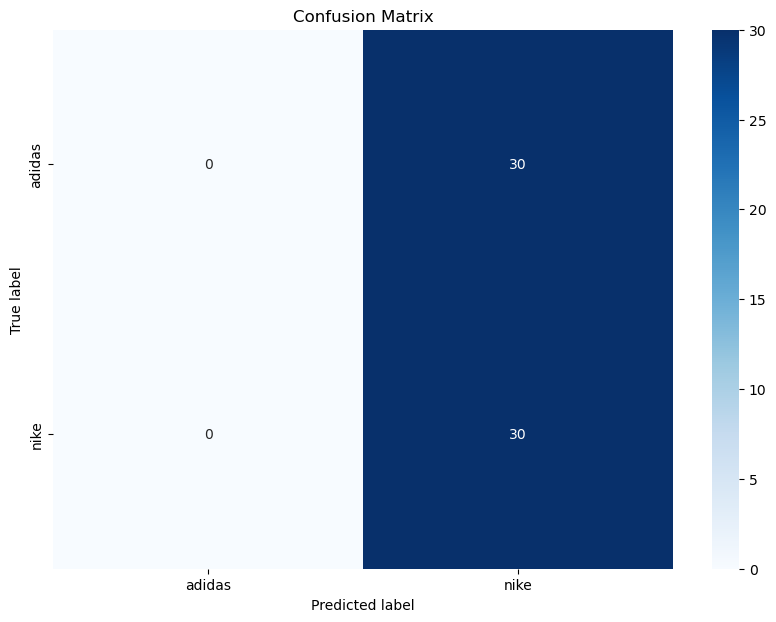

              precision    recall  f1-score   support

      adidas       0.00      0.00      0.00        30
        nike       0.50      1.00      0.67        30

    accuracy                           0.50        60
   macro avg       0.25      0.50      0.33        60
weighted avg       0.25      0.50      0.33        60



C:\Users\MSI KATANA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MSI KATANA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MSI KATANA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_pred is the predicted classes from your model
y_pred = np.argmax(model.predict(test_gen), axis=-1)

# Define target names (class names)
target_names = list(test_gen.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(cm, classes=target_names, title='Confusion Matrix')

# Classification report
print(classification_report(test_gen.classes, y_pred, target_names=target_names))


In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

# Assuming train_gen and valid_gen are your image data generators

img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))

# Create pre-trained model
base_model = tf.keras.applications.ResNet50(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')
for layer in base_model.layers:
    layer.trainable = False
model = Sequential([
    base_model,
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.3),
     Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(class_count, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define filepath to save the best model
filepath = 'best_model_resnet.h5'

# Create ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# Train the model with the added callback
history = model.fit(
    x=train_gen,
    epochs=20,
    verbose=1,
    validation_data=valid_gen,
    callbacks=[checkpoint]
)


Epoch 1/20


C:\Users\MSI KATANA\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5/5 [==============================] - ETA: 0s - loss: 0.8211 - accuracy: 0.5478
Epoch 1: val_accuracy improved from -inf to 0.60000, saving model to best_model_resnet.h5


C:\Users\MSI KATANA\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 22s 4s/step - loss: 0.8211 - accuracy: 0.5478 - val_loss: 0.7333 - val_accuracy: 0.6000
Epoch 2/20
5/5 [==============================] - ETA: 0s - loss: 0.7356 - accuracy: 0.6522
Epoch 2: val_accuracy did not improve from 0.60000
5/5 [==============================] - 14s 3s/step - loss: 0.7356 - accuracy: 0.6522 - val_loss: 0.9430 - val_accuracy: 0.5273
Epoch 3/20
5/5 [==============================] - ETA: 0s - loss: 0.6508 - accuracy: 0.6717
Epoch 3: val_accuracy did not improve from 0.60000
5/5 [==============================] - 14s 3s/step - loss: 0.6508 - accuracy: 0.6717 - val_loss: 1.1271 - val_accuracy: 0.4909
Epoch 4/20
5/5 [==============================] - ETA: 0s - loss: 0.6316 - accuracy: 0.6783
Epoch 4: val_accuracy did not improve from 0.60000
5/5 [==============================] - 14s 3s/step - loss: 0.6316 - accuracy: 0.6783 - val_loss: 1.3229 - val_accuracy: 0.4909
Epoch 5/20
5/5 [==============================] - ETA: 0s - los

In [32]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Average


In [33]:
model= load_model('best_model_resnet.h5')

In [34]:
train_score = model.evaluate(train_gen, steps= len(train_gen), verbose= 1)
valid_score = model.evaluate(valid_gen, steps= len(valid_gen), verbose= 1)
test_score = model.evaluate(test_gen, steps= len(test_gen), verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

1/1 [==============================] - 1s 1s/step - loss: 0.7836 - accuracy: 0.5667
Train Loss:  0.77828449010849
Train Accuracy:  0.5173913240432739
--------------------
Validation Loss:  0.7677497267723083
Validation Accuracy:  0.6000000238418579
--------------------
Test Loss:  0.7836081981658936
Test Accuracy:  0.5666666626930237


In [35]:
model = load_model('best_model_resnet.h5')
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)
print(y_pred)

C:\Users\MSI KATANA\AppData\Local\Temp\ipykernel_17028\3099705374.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_gen)


[0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1]


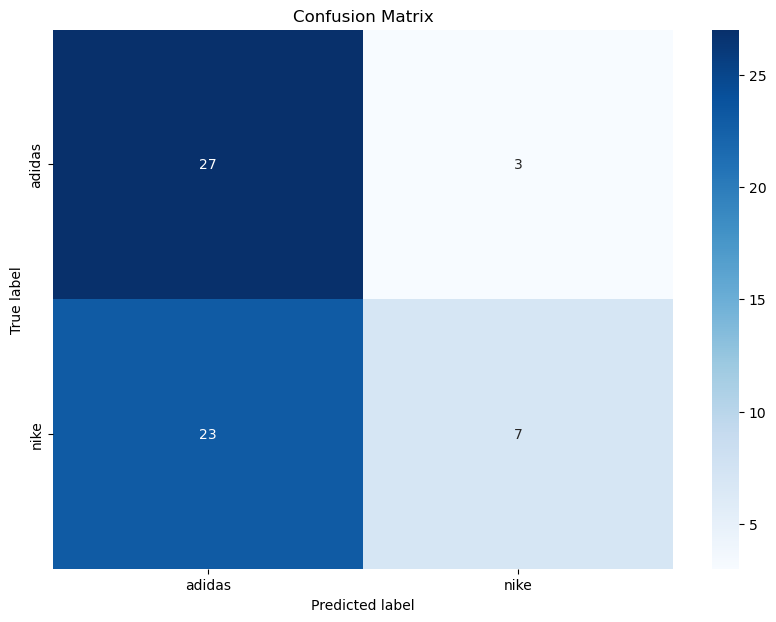

              precision    recall  f1-score   support

      adidas       0.54      0.90      0.68        30
        nike       0.70      0.23      0.35        30

    accuracy                           0.57        60
   macro avg       0.62      0.57      0.51        60
weighted avg       0.62      0.57      0.51        60



In [36]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm= cm, classes= target_names, title = 'Confusion Matrix')
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= target_names))

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

In [38]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))

# Create pre-trained model
base_model = tf.keras.applications.VGG16(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')
for layer in base_model.layers:
    layer.trainable = False
model = Sequential([
    base_model,
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.3),
     Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(class_count, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define filepath to save the best model
filepath = 'best_model_vgg.h5'

# Create ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# Train the model with the added callback
history = model.fit(
    x=train_gen,
    epochs=20,
    verbose=1,
    validation_data=valid_gen,
    callbacks=[checkpoint]
)

C:\Users\MSI KATANA\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/20
5/5 [==============================] - ETA: 0s - loss: 0.7990 - accuracy: 0.6109
Epoch 1: val_accuracy improved from -inf to 0.54545, saving model to best_model_vgg.h5
5/5 [==============================] - 35s 7s/step - loss: 0.7990 - accuracy: 0.6109 - val_loss: 0.7931 - val_accuracy: 0.5455
Epoch 2/20


C:\Users\MSI KATANA\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - ETA: 0s - loss: 0.5489 - accuracy: 0.7500
Epoch 2: val_accuracy improved from 0.54545 to 0.58182, saving model to best_model_vgg.h5
5/5 [==============================] - 34s 7s/step - loss: 0.5489 - accuracy: 0.7500 - val_loss: 0.8918 - val_accuracy: 0.5818
Epoch 3/20
5/5 [==============================] - ETA: 0s - loss: 0.4855 - accuracy: 0.7978
Epoch 3: val_accuracy did not improve from 0.58182
5/5 [==============================] - 34s 7s/step - loss: 0.4855 - accuracy: 0.7978 - val_loss: 1.0853 - val_accuracy: 0.5455
Epoch 4/20
5/5 [==============================] - ETA: 0s - loss: 0.4573 - accuracy: 0.8130
Epoch 4: val_accuracy did not improve from 0.58182
5/5 [==============================] - 35s 7s/step - loss: 0.4573 - accuracy: 0.8130 - val_loss: 0.9567 - val_accuracy: 0.5818
Epoch 5/20
5/5 [==============================] - ETA: 0s - loss: 0.4298 - accuracy: 0.8109
Epoch 5: val_accuracy did not improve from 0.58182
5/5 [==============

In [39]:
model= load_model('best_model_vgg.h5')


train_score = model.evaluate(train_gen, steps= len(train_gen), verbose= 1)
valid_score = model.evaluate(valid_gen, steps= len(valid_gen), verbose= 1)
test_score = model.evaluate(test_gen, steps= len(test_gen), verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

1/1 [==============================] - 4s 4s/step - loss: 0.7228 - accuracy: 0.6000
Train Loss:  0.3059218227863312
Train Accuracy:  0.873913049697876
--------------------
Validation Loss:  0.6973200440406799
Validation Accuracy:  0.6727272868156433
--------------------
Test Loss:  0.7228193879127502
Test Accuracy:  0.6000000238418579


In [40]:
model = load_model('best_model_vgg.h5')
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)
print(y_pred)

C:\Users\MSI KATANA\AppData\Local\Temp\ipykernel_17028\649364068.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_gen)


[1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


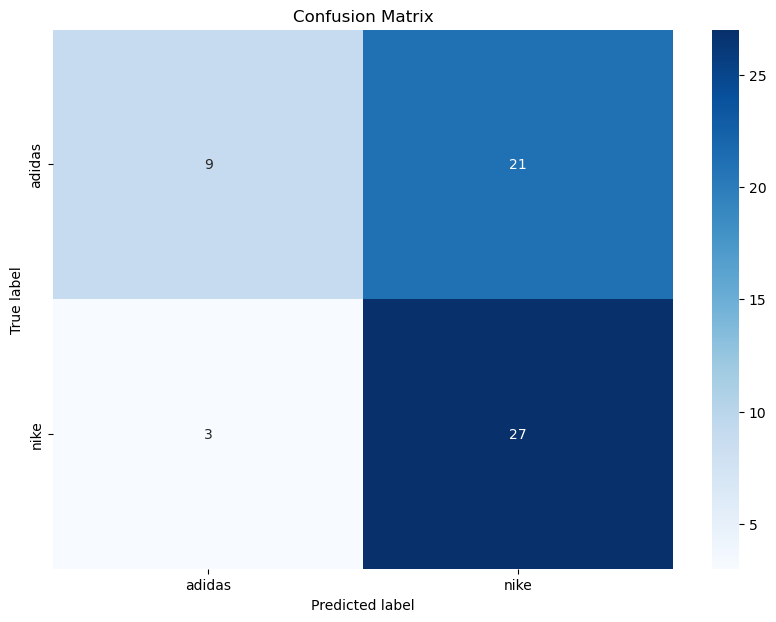

              precision    recall  f1-score   support

      adidas       0.75      0.30      0.43        30
        nike       0.56      0.90      0.69        30

    accuracy                           0.60        60
   macro avg       0.66      0.60      0.56        60
weighted avg       0.66      0.60      0.56        60



In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm= cm, classes= target_names, title = 'Confusion Matrix')
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= target_names))